<a href="https://colab.research.google.com/github/Mathildeholst/Git_training/blob/main/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network - F1

*   Listepunkt
*   Listepunkt



**Loading the MNIST dataset in Keras**

---



In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


MNIST is a famous dataset used for training machine learning models to recognize handwritten digits (0-9).
Multi-class: There are 10 possible classes (digits 0 to 9).
Classification task: The goal is to predict the correct digit for each image.
*   Training set: 60,000 labeled images used to teach the Model
*   Test set: 10,000 labeled images used to check how well the model learned.

In [ ]:
train_images.shape

(60000, 28, 28)


*   60,000 → Number of images in the training set.
*   28 × 28 → Each image is 28x28 pixels (grayscale, no color channels).



In [ ]:
len(train_labels)

60000

len(train_labels) = 60,000 means there are 60,000 labels, one for each training image.

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

train_labels is an array of numbers (0-9), where each number represents the correct digit for a corresponding image in train_images.

* The first image is a 5
* The second image is a 0
* The third image is a 4

These labels are used to train the model by telling it the correct answer for each image.




In [ ]:
test_images.shape

(10000, 28, 28)

* 10,000 → Number of images in the test set.
* 28 × 28 → Each image is 28x28 pixels (grayscale, no color channels).

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

* train_images = The input (handwritten digit pictures).
* train_labels = The output (correct number for each image).
* test_images → Images of handwritten digits (10,000 images, each 28x28 pixels).
* test_labels → The correct answers (10,000 labels, each a digit from 0-9).


**The network architecture**

---



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

*1️⃣ Importing Keras and Layers*
* keras: A deep learning library inside TensorFlow.
* layers: Used to build layers for the neural network.

*2️⃣ Creating a Sequential Model*
* keras.Sequential([]) → A simple way to stack layers one after another in order.
* A sequential fully connected (dense) network is a neural network where every neuron in one layer is connected to every neuron in the next layer.

*3️⃣ First Layer (Hidden Layer)*
* Dense(512) → A fully connected hidden layer with 512 neurons.
  * 512 is an arbitrary choice but commonly used for deep learning models. A higher number of neurons helps the model learn complex patterns in the input data.
* activation="relu" → Uses ReLU (Rectified Linear Unit), which helps the model learn complex patterns efficiently.

*4️⃣ Second Layer (Output Layer)*
* Dense(10) → The output layer with 10 neurons (one for each digit 0-9).
  *  There are 10 possible digits (0-9), so we need 10 neurons—one for each class.
* activation="softmax" → Converts the outputs into probabilities, so the model can pick the most likely digit.

**The compilation step**

Get the network ready for training (compilation)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

* An optimizer — how the model will update itself when it sees training data
* A loss function - how the model will measure its performance
* metrics to monitor - here, accuracy

* optimizer="rmsprop" → Helps adjust weights efficiently for better learning.
* loss="sparse_categorical_crossentropy" → Used for multi-class classification (digits 0-9).
* metrics=["accuracy"] → Tracks how often predictions are correct.


In [ ]:
print(train_images.min(), train_images.max())

0 255


Shows the range of the pixels value used below

**Preparing the image data**

Transform images to a float32 array of shape (60000, 28 * 28) with values between 0 and 1

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

*1. Reshaping the Images*

* The original images are 28x28 pixels.
* reshape((60000, 28 * 28)) converts them into a flat 1D array of 784 pixels per image.

*2. Normalizing the Pixel Values*
* The pixel values originally range from 0 to 255.
* Dividing by 255 scales them to a range between 0 and 1.
* In grayscale images (like MNIST), each pixel is represented by an integer from 0 to 255.



**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8759 - loss: 0.4314
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9656 - loss: 0.1165
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9796 - loss: 0.0708
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9848 - loss: 0.0490
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9893 - loss: 0.0364


* train_images and train_labels → The training data (images and correct labels).
* epochs=5 → The model goes through the entire dataset 5 times to improve learning.
* batch_size=128 → The model processes 128 images at a time before updating weights.

*Why Use Batches?*
* Training on all images at once is too slow.
* Using smaller batches (128 at a time) makes training faster and more efficient.
* Small batch sizes (e.g., 16, 32) More updates, but training is slower because the model updates too often.
* Large batch sizes (e.g., 256, 512, 1024)
Faster, but may not generalize well (can get stuck in local minima).

SE UDD. I FORELSÆNING 1 - Train the model


**Using the model to make predictions**

Take the 10 first images in the test set and predict for these

Then look at the probabilities for the first image

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([3.9813060e-07, 2.0947910e-08, 4.9943937e-06, 1.9326540e-04,
       1.4754845e-11, 4.9837286e-07, 4.6406160e-11, 9.9978423e-01,
       7.6238928e-07, 1.5947255e-05], dtype=float32)

* test_digits = test_images[0:10] = Extracts the first 10 images from test_images.
* predictions = model.predict(test_digits) =The model processes the 10 test images and predicts their digit labels.
* predictions[0] = Displays the prediction for the first test images
  * The output is an array of 10 values, each representing the model's confidence in the image being a specific digit (0-9).

In [ ]:
predictions[0].argmax()

7

* predictions[0] → This is an array of 10 probability values, one for each digit (0-9).
* .argmax() → Returns the index of the highest probability, which is the model’s predicted digit.

*it means the model predicts that the first test image is a "7".*

In [ ]:
predictions[0][7]

0.99978423

* The value 0.99978423 means the model is 99.98% confident that the first test image is a 7.
* This is a very high probability, meaning the model is almost certain that the image is a 7.

In [ ]:
test_labels[0]

7

Since test_labels[0] returns 7, it means the actual number in the first test image is 7.
* Man bruger test_labels, da det er de rigtige værdier, hvor i mod test images er de håndskrevet tal



**Evaluating the model on new data**

On average, how good is our model at classifying such never-before-seen digits?

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9761 - loss: 0.0732
test_acc: 0.9810000061988831


* Runs the trained model on the test dataset (test_images).
* Compares the model's predictions with the actual labels (test_labels).
* test_acc: 0.9810000061988831 → The final test accuracy is 98.1%.
  * This means the model correctly classified 98.1% of the test images.
  * loss: 0.0732 → The loss value, which measures how far predictions were from the correct answers. Lower is better.

## Data representations for neural networks - F2

### Scalars (rank-0 tensors)
A tensor with only 1 number is a scalar. Here is a NumPy scalar

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

import numpy as np
* This imports the NumPy library, which is used for handling arrays and numerical data.

x = np.array(12)
* This creates a NumPy array with a single number, 12.
* So x is a scalar (just one value), stored as a 0-dimensional array (also called a rank 0 tensor). This is also called a 0-D tensor in deep learning.

x.ndim
* ndim stands for "number of dimensions"
* Since x is just a single number, it has 0 dimensions

### Vectors (rank-1 tensors)
A tensor with an array of numbers is a vector

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
x.ndim

1

This is a 5-dimensional vector, but it’s a 1-dimensional tensor (a tensor of rank 1)!

vector = rank-1 tensor = 1D tensor

### Matrices (rank-2 tensors)
A tensor with an array of vectors is a matrix

In [10]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

This is a matrix in math, or a 2-D tensor in deep learning.

**Eks. **

An actuarial dataset of people, where we consider each person’s age, gender, and income. Each person can be characterized as a vector of 3 values, and thus an entire dataset of 100,000 people can be stored in a rank-2 tensor of shape (100000, 3).


### Rank-3 and higher-rank tensors
A tensor with an array of matrices is a rank-3 tensor

In [8]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

This array has 3 dimensions:

* Depth (3 blocks)

* Rows (3 per block)

* Columns (5 per row)

This is called a 3D tensor or a rank 3 tensor.

In [9]:
x.shape

(3, 3, 5)

Bekræfter ovenstående

### Key attributes
Vælg billede og sådan

In [13]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Loads the MNIST dataset (70,000 handwritten digit images)

It gives you:

* train_images → 60,000 images for training
* train_labels → their correct digits (0–9)
* test_images → 10,000 images for testing
* test_labels → their correct digits

In [14]:
train_images.ndim

3

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
train_images.dtype

dtype('uint8')

* train_images.ndim → Tells how many dimensions the data has (here: 3).
* train_images.shape → Shows the size: number of images, height, and width.
* train_images.dtype → Tells the type of data (here: integers from 0 to 255).

**Displaying the fourth digit**

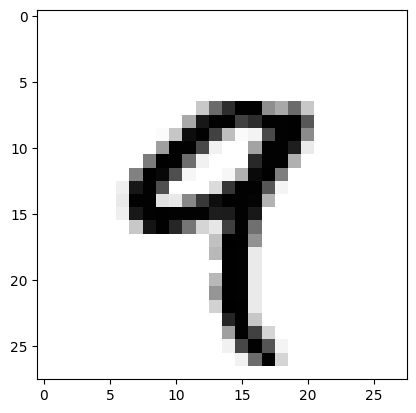

In [17]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [18]:
train_labels[4]

np.uint8(9)

**First code shows you what one digit (a handwritten number) looks like from the training data.**

* import matplotlib.pyplot as plt
Imports a library for showing images and plots.

* digit = train_images[4]
Picks image number 5 (index 4) from the training set.

* plt.imshow(digit, cmap=plt.cm.binary)
Shows the image in black and white (binary colors).

* plt.show()
Displays the image in a pop-up window or notebook output.

**Second code. This gives you the label (correct digit) for the 5th image in the training set (index 4).**

* train_images → These are the pictures of handwritten digits (28x28 pixels).
* train_labels → These are the correct answers (what number is in each picture).


### Manipulating tensors in NumPy
Tensor slicing - selecting elements in a tensor

In [19]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

train_images[10:100]
* Takes a slice of the training images — from image 10 to 99 (total of 90 images).
* This creates a new set with 90 images from the training data.

my_slice.shape
* Shows the shape (size) of the sliced data.

In [20]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

* 10:100 → Selects images from index 10 to 99 (90 images)
* : → Keeps all rows (28 pixels high)
* : → Keeps all columns (28 pixels wide)

This is the same as before — you are taking 90 full images, and each image keeps its full pixel data. The slicing is just written more explicitly.

In [21]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

This code takes 90 images and includes the full 28×28 pixels of each — just like before, but written more clearly with exact pixel ranges.

In [23]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

* : → Selects all images
* 14: → From row 14 to 27 (lower half of the image)
* 14: → From column 14 to 27 (right half of the image)

This slices out the lower right 14×14 area from all 60,000 images in the training set.

In [25]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

* : → Selects all 60,000 images
* 7:-7 → Takes rows from index 7 to index 20 (excluding the first and last 7 rows)
* 7:-7 → Takes columns from index 7 to index 20 (excluding the first and last 7 columns)

This keeps the central 14×14 pixels from each image and removes the outer edges (7 pixels from each side).

### The notion of data batches
Deep learning models don’t look at all the data at once.
Instead, they split the data into small parts, called batches.

In [26]:
batch = train_images[:128]

In [27]:
batch = train_images[128:256]

In [29]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

batch = train_images[:128]
* Selects the first 128 images from the training set
* You create a batch of 128 images, often used to feed into the model during training.

batch = train_images[128:256]
* You are now selecting the next 128 images from the training set — this is how batches are often loaded during training.

n = 3
batch = train_images[128 * n:128 * (n + 1)]
* n = 3 → You want the 4th batch (since counting starts at 0)
* 128 * 3 = 384
* 128 * (3 + 1) = 512

The 128 images from index 384 to 511

## The gears of neural networks: tensor operations - F2

**General**

**What Is a Layer?**
* In deep learning, a layer is just a function.
It takes input, does some math, and gives output.

In [ ]:
keras.layers.Dense(512, activation="relu")

* We want 512 neurons
* Each will use the ReLU activation function
* It’s a fully connected (Dense) layer

**How Does It Work?**

It does this calculation:

In [ ]:
output = relu(dot(input, W) + b)

* dot(input, W) → Multiply the input by weights (W)
* +b → Add a bias term (b)
* relu(...) → Apply the activation function (ReLU = only keep positive values)

A layer is a function that takes input, does some math with weights and bias,
and applies an activation to create the output.

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

In [ ]:
x = x.reshape((6, 1))
x

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

## The engine of neural networks: gradient-based optimization

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

### Evaluating the model

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

## Summary